In [667]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import shape
import contextily as ctx 
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [668]:
url_collison  = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/dft-road-casualty-statistics-collision-2023.csv'
url_vehicle = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/dft-road-casualty-statistics-vehicle-2023.csv'
url_MSOA = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/MSOA/MSOA_2011_London_gen_MHW.shp'
url_cycle_lane = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/cycle_lane_track.json'


In [669]:
df_collison = pd.read_csv(url_collison)
df_vehicle = pd.read_csv(url_vehicle)
msoa_london = gpd.read_file(url_MSOA)
cycle_lane = pd.read_json(url_cycle_lane)

print(f"Data frame collison is {df_collison.shape[0]:,} x {df_collison.shape[1]}")
print(f"Data frame vehicle is {df_vehicle.shape[0]:,} x {df_vehicle.shape[1]}")
print(f"Data frame msoa_london is {msoa_london.shape[0]:,} x {msoa_london.shape[1]}")
print(f"Data frame cycle_lane is {cycle_lane.shape[0]:,} x {cycle_lane.shape[1]}")
#Data frame collison is 104,258 x 37, Data frame vehicle is 189,815 x 34 It mean df_collision is unique for each accident_index

/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_78240/4050822527.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collison = pd.read_csv(url_collison)
/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_78240/4050822527.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicle = pd.read_csv(url_vehicle)


Data frame collison is 104,258 x 37
Data frame vehicle is 189,815 x 34
Data frame msoa_london is 983 x 13
Data frame cycle_lane is 24,976 x 3


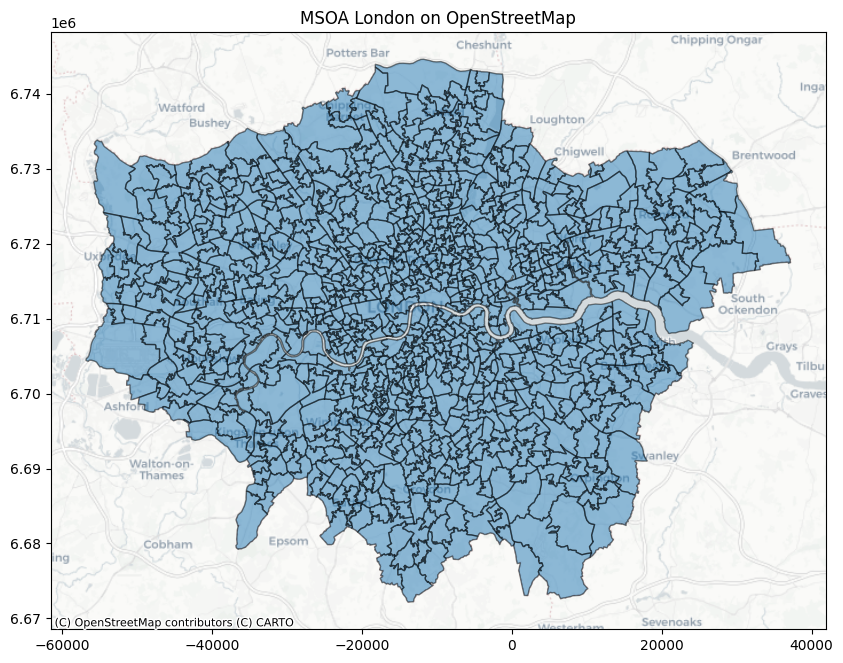

In [670]:
msoa_london = msoa_london.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
msoa_london.plot(ax=ax, alpha=0.5, edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('MSOA London on OpenStreetMap')
plt.show()

In [671]:
msoa_london

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0    E02000001        City of London 001  E09000001        City of London   
1    E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   
..         ...                       ...        ...                   ...   
978  E02006927             Greenwich 034  E09000011             Greenwich   
979  E02006928             Greenwich 035  E09000011             Greenwich   
980  E02006929             Greenwich 036  E09000011             Greenwich   
981  E02006930             Greenwich 037  E09000011             Greenwich   
982  E02006931             Greenwich 038  E09000011             Greenwich   

       RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0    E12000007  London      7375      7187        188    25.5    4385   
1    E12000007  London      6775      6724         51    31.3    2713   
2    E12000007  London     10045     10033         12    46.9    3834   
3    E12000007  London      6182      5937        245    24.8    2318   
4    E12000007  London      8562      8562          0    72.1    3183   
..         ...     ...       ...       ...        ...     ...     ...   
978  E12000007  London      8315      8241         74    33.0    3338   
979  E12000007  London      7341      6410        931   136.0    2977   
980  E12000007  London      7490      7489          1    29.4    3333   
981  E12000007  London      6561      6557          4    75.6    2876   
982  E12000007  London      9186      8973        213    46.1    4113   

     AVHHOLDSZ                                           geometry  
0          1.6  MULTIPOLYGON (((-11592.961 6711723.63, -11625....  
1          2.5  POLYGON ((16484.761 6727544.35, 16482.04 67274...  
2          2.6  POLYGON ((16767.625 6725085.822, 16517.78 6724...  
3          2.6  POLYGON ((20603.005 6721814.792, 20482.624 672...  
4          2.7  POLYGON ((16684.35 6722400.609, 16782.003 6722...  
..         ...                                                ...  
978        2.5  POLYGON ((3225.029 6704460.668, 3331.4 6704127...  
979        2.2  MULTIPOLYGON (((-1072.855 6707297.778, -1092.2...  
980        2.2  POLYGON ((1798.887 6709464.191, 2061.174 67093...  
981        2.3  POLYGON ((961.645 6708282.851, 928.455 6708211...  
982        2.2  POLYGON ((-226.311 6706921.234, -153.889 67069...  

[983 rows x 13 columns]

In [672]:
df_collison

accident_index  accident_year accident_reference  \
0       2023010419171           2023           10419171   
1       2023010419183           2023           10419183   
2       2023010419189           2023           10419189   
3       2023010419191           2023           10419191   
4       2023010419192           2023           10419192   
...               ...            ...                ...   
104253  2023991452286           2023          991452286   
104254  2023991452640           2023          991452640   
104255  2023991453360           2023          991453360   
104256  2023991461915           2023          991461915   
104257  2023991462793           2023          991462793   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    525060.0                170416.0  -0.202878  51.418974   
1                    535463.0                198745.0  -0.042464  51.671155   
2                    508702.0                177696.0  -0.435789  51.487777   
3                    520341.0                190175.0  -0.263972  51.597575   
4                    527255.0                176963.0  -0.168976  51.477324   
...                       ...                     ...        ...        ...   
104253               246754.0                661133.0  -4.447490  55.819059   
104254               224491.0                581627.0  -4.752200  55.097920   
104255               383341.0                806427.0  -2.276957  57.148422   
104256               271662.0                655488.0  -4.047591  55.775637   
104257               327349.0                666746.0  -3.163102  55.888350   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   3  ...   
2                  1                  3                   2  ...   
3                  1                  3                   2  ...   
4                  1                  3                   2  ...   
...              ...                ...                 ...  ...   
104253            99                  2                   1  ...   
104254            99                  3                   2  ...   
104255            99                  3                   2  ...   
104256            99                  3                   1  ...   
104257            99                  3                   2  ...   

        light_conditions weather_conditions  road_surface_conditions  \
0                      4                  8                        2   
1                      4                  1                        1   
2                      4                  1                        1   
3                      4                  9                        1   
4                      4                  1                        1   
...                  ...                ...                      ...   
104253                 5                  2                        2   
104254                 1                  9                        1   
104255                 4                  2                        2   
104256                 4                  8                        1   
104257                 1                  1                        1   

       special_conditions_at_site  carriageway_hazards urban_or_rural_area  \
0                               0                    0                   1   
1                               0                    0                   1   
2                               0                    0                   1   
3                               0                    0                   1   
4                               0                    0                   1   
...                           ...                  ...                 ...   
104253                         -1                   -1                   1   
104254                          0          

In [673]:
df_vehicle

accident_index  accident_year accident_reference  vehicle_reference  \
0       2023010419171           2023           10419171                  1   
1       2023010419183           2023           10419183                  1   
2       2023010419183           2023           10419183                  2   
3       2023010419183           2023           10419183                  3   
4       2023010419189           2023           10419189                  1   
...               ...            ...                ...                ...   
189810  2023991453360           2023          991453360                  1   
189811  2023991453360           2023          991453360                  2   
189812  2023991461915           2023          991461915                  1   
189813  2023991462793           2023          991462793                  1   
189814  2023991462793           2023          991462793                  2   

        vehicle_type  towing_and_articulation  vehicle_manoeuvre  \
0                 11                        0                  4   
1                 11                        0                 18   
2                  9                        0                  9   
3                  9                        0                  8   
4                  9                        0                 18   
...              ...                      ...                ...   
189810             9                        0                 18   
189811             3                        0                  3   
189812             9                        0                  5   
189813             9                        0                 12   
189814             9                        0                 18   

        vehicle_direction_from  vehicle_direction_to  \
0                            1                     5   
1                            5                     1   
2                            1                     6   
3                            7                     1   
4                            7                     3   
...                        ...                   ...   
189810                       7                     3   
189811                       7                     3   
189812                       3                     1   
189813                       2                     6   
189814                       2                     6   

        vehicle_location_restricted_lane  ...              generic_make_model  \
0                                      0  ...  ALEXANDER DENNIS MODEL MISSING   
1                                      0  ...                WRIGHTBUS GEMINI   
2                                      0  ...                    TOYOTA YARIS   
3                                      0  ...                    BMW 2 SERIES   
4                                      0  ...                    LEXUS RX 400   
...                                  ...  ...                             ...   
189810                                 0  ...                     FORD FIESTA   
189811                                 0  ...                    KTM 125 DUKE   
189812                                 0  ...                    BMW 3 SERIES   
189813                                 0  ...                              -1   
189814                                 0  ...                              -1   

        driver_imd_decile  driver_home_area_type  lsoa_of_driver  \
0                       3                      1       E01001177   
1                       6                      1       E01001419   
2                       3                      1       E01001546   
3                       4                      1       E01001686   
4                       5                      1       E01002443   
...                   ...                    ...             ...   
189810                 10                      2              -1   
189811                  7                      1              -

In [674]:
select_df_vehicle = df_vehicle[df_vehicle['accident_index'] == 2023010419183] 
select_df_vehicle

accident_index  accident_year accident_reference  vehicle_reference  \
1  2023010419183           2023           10419183                  1   
2  2023010419183           2023           10419183                  2   
3  2023010419183           2023           10419183                  3   

   vehicle_type  towing_and_articulation  vehicle_manoeuvre  \
1            11                        0                 18   
2             9                        0                  9   
3             9                        0                  8   

   vehicle_direction_from  vehicle_direction_to  \
1                       5                     1   
2                       1                     6   
3                       7                     1   

   vehicle_location_restricted_lane  ...  generic_make_model  \
1                                 0  ...    WRIGHTBUS GEMINI   
2                                 0  ...        TOYOTA YARIS   
3                                 0  ...        BMW 2 SERIES   

   driver_imd_decile  driver_home_area_type  lsoa_of_driver  escooter_flag  \
1                  6                      1       E01001419              0   
2                  3                      1       E01001546              0   
3                  4                      1       E01001686              0   

   dir_from_e  dir_from_n  dir_to_e  dir_to_n  driver_distance_banding  
1         NaN         NaN       NaN       NaN                        2  
2         NaN         NaN       NaN       NaN                        1  
3         NaN         NaN       NaN       NaN                        4  

[3 rows x 34 columns]

In [675]:
selected_rows = df_collison[df_collison['accident_index'] == 2023010419183]
selected_rows

accident_index  accident_year accident_reference  location_easting_osgr  \
1  2023010419183           2023           10419183               535463.0   

   location_northing_osgr  longitude   latitude  police_force  \
1                198745.0  -0.042464  51.671155             1   

   accident_severity  number_of_vehicles  ...  light_conditions  \
1                  3                   3  ...                 4   

  weather_conditions  road_surface_conditions special_conditions_at_site  \
1                  1                        1                          0   

   carriageway_hazards urban_or_rural_area  \
1                    0                   1   

  did_police_officer_attend_scene_of_accident  trunk_road_flag  \
1                                           1                2   

   lsoa_of_accident_location  enhanced_severity_collision  
1                  E01001547                           -1  

[1 rows x 37 columns]

In [676]:
df_vehicle_collison = pd.merge(df_vehicle, df_collison, on='accident_index', how='left')
df_vehicle_collison_bike = df_vehicle_collison[df_vehicle_collison['vehicle_type'] == 1]
df_vehicle_collison_bike


accident_index  accident_year_x accident_reference_x  \
7       2023010419191             2023             10419191   
11      2023010419201             2023             10419201   
38      2023010419297             2023             10419297   
53      2023010419324             2023             10419324   
57      2023010419335             2023             10419335   
...               ...              ...                  ...   
189690  2023991394948             2023            991394948   
189757  2023991416532             2023            991416532   
189759  2023991417384             2023            991417384   
189764  2023991418531             2023            991418531   
189775  2023991430845             2023            991430845   

        vehicle_reference  vehicle_type  towing_and_articulation  \
7                       2             1                        0   
11                      1             1                        0   
38                      2             1                        0   
53                      2             1                        0   
57                      2             1                        0   
...                   ...           ...                      ...   
189690                  2             1                        0   
189757                  2             1                        0   
189759                  2             1                        0   
189764                  1             1                        0   
189775                  1             1                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
7                      18                       8                     4   
11                     18                       7                     3   
38                     18                       7                     3   
53                     18                       5                     1   
57                     14                       1                     5   
...                   ...                     ...                   ...   
189690                  9                       8                     4   
189757                 18                       3                     7   
189759                  9                       4                     1   
189764                 18                       3                     7   
189775                 18                       1                     5   

        vehicle_location_restricted_lane  ...  light_conditions  \
7                                      0  ...               4.0   
11                                     0  ...               4.0   
38                                     0  ...               6.0   
53                                     0  ...               1.0   
57                                     0  ...               1.0   
...                                  ...  ...               ...   
189690                                 0  ...               1.0   
189757                                 0  ...               4.0   
189759                                 0  ...               1.0   
189764                                 0  ...               4.0   
189775                                 0  ...               4.0   

        weather_conditions  road_surface_conditions  \
7                      9.0                      1.0   
11                     1.0                      2.0   
38                     1.0                      1.0   
53                     1.0                      1.0   
57                     1.0                      1.0   
...                    ...                      ...   
189690                 1.0                      1.0   
189757                 1.0                      1.0   
189759                 8.0                      2.0   
189764                 2.0                      2.0   
189775                 2.0                      2.0   

        special_conditions_at_site  carriageway_hazards  urban_or_

In [677]:
df_collison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               104258 non-null  object 
 1   accident_year                                104258 non-null  int64  
 2   accident_reference                           104258 non-null  object 
 3   location_easting_osgr                        104246 non-null  float64
 4   location_northing_osgr                       104246 non-null  float64
 5   longitude                                    104246 non-null  float64
 6   latitude                                     104246 non-null  float64
 7   police_force                                 104258 non-null  int64  
 8   accident_severity                            104258 non-null  int64  
 9   number_of_vehicles                           104258 non-nul

In [678]:
columns_to_use = ['accident_index', 'accident_year', 'accident_severity', 'number_of_vehicles', 'number_of_casualties','junction_control',
                  'junction_detail','pedestrian_crossing_physical_facilities','light_conditions','weather_conditions','road_surface_conditions', 'carriageway_hazards',
                  'road_type','date', 'time','day_of_week', 'longitude', 'latitude']    #'vehicle_type','sex_of_driver','age_band_of_driver',
df_collison_2023 = df_collison[columns_to_use]
df_collison_2023

accident_index  accident_year  accident_severity  number_of_vehicles  \
0       2023010419171           2023                  3                   1   
1       2023010419183           2023                  3                   3   
2       2023010419189           2023                  3                   2   
3       2023010419191           2023                  3                   2   
4       2023010419192           2023                  3                   2   
...               ...            ...                ...                 ...   
104253  2023991452286           2023                  2                   1   
104254  2023991452640           2023                  3                   2   
104255  2023991453360           2023                  3                   2   
104256  2023991461915           2023                  3                   1   
104257  2023991462793           2023                  3                   2   

        number_of_casualties  junction_control  junction_detail  \
0                          1                 4                9   
1                          2                 4                3   
2                          1                 4                1   
3                          1                 4                3   
4                          1                 4                8   
...                      ...               ...              ...   
104253                     1                -1                0   
104254                     1                 4                9   
104255                     1                -1                0   
104256                     1                 4                9   
104257                     1                 2                1   

        pedestrian_crossing_physical_facilities  light_conditions  \
0                                             5                 4   
1                                             1                 4   
2                                             0                 4   
3                                             0                 4   
4                                             0                 4   
...                                         ...               ...   
104253                                       -1                 5   
104254                                        0                 1   
104255                                       -1                 4   
104256                                       -1                 4   
104257                                        0                 1   

        weather_conditions  road_surface_conditions  carriageway_hazards  \
0                        8                        2                    0   
1                        1                        1                    0   
2                        1                        1                    0   
3                        9                        1                    0   
4                        1                        1                    0   
...                    ...                      ...                  ...   
104253                   2                        2                   -1   
104254                   9                        1                    0   
104255                   2                        2                   -1   
104256                   8                        1                   -1   
104257                   1                        1                    0   

        road_type        date   time  day_of_week  longitude   latitude  
0               2  01/01/2023  01:24            1  -0.202878  51.418974  
1               6  01/01/2023  02:25            1  -0.042464  51.671155  
2               1  01/01/2023  03:50            1  -0.435789  51.487777  
3               6  01/01/2023  02:13            1  -0.263972  51.597575  
4               6  01/01/2023  01:42            1  -0.168976  51.477324  
...           ...         ...    ...          ...        ...       

## the data is include the accident data overaround the UK

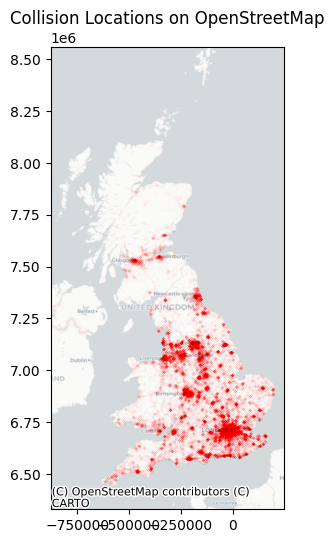

In [679]:
geometry = [Point(xy) for xy in zip(df_collison_2023['longitude'], df_collison_2023['latitude'])]
gdf = gpd.GeoDataFrame(df_collison_2023, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=0.01, alpha=0.1)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('Collision Locations on OpenStreetMap')
plt.show()

### Spatial Join Collision data and London MSOA

In [680]:
# create a GeoDataFrame for df_collison_2023
geometry = [Point(xy) for xy in zip(df_collison_2023['longitude'], df_collison_2023['latitude'])]
gdf_collison = gpd.GeoDataFrame(df_collison_2023, geometry=geometry, crs="EPSG:4326")

# change to the same CRS
gdf_collison = gdf_collison.to_crs(epsg=3857)
msoa_london = msoa_london.to_crs(epsg=3857)

# spatial join
collisions_in_msoa = gpd.sjoin(gdf_collison, msoa_london, how="inner", predicate='intersects')

# keep the columns of gdf_collison and choose the columns of msoa_london I want to keep
columns_to_keep = gdf_collison.columns.tolist() + ['MSOA11CD', 'LAD11CD', 'LAD11NM']
collisions_in_msoa = collisions_in_msoa[columns_to_keep]

print(collisions_in_msoa.info())
collisions_in_msoa.to_csv('/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/collisions_in_msoa.csv', index=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22884 entries, 0 to 87867
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   accident_index                           22884 non-null  object  
 1   accident_year                            22884 non-null  int64   
 2   accident_severity                        22884 non-null  int64   
 3   number_of_vehicles                       22884 non-null  int64   
 4   number_of_casualties                     22884 non-null  int64   
 5   junction_control                         22884 non-null  int64   
 6   junction_detail                          22884 non-null  int64   
 7   pedestrian_crossing_physical_facilities  22884 non-null  int64   
 8   light_conditions                         22884 non-null  int64   
 9   weather_conditions                       22884 non-null  int64   
 10  road_surface_conditions        

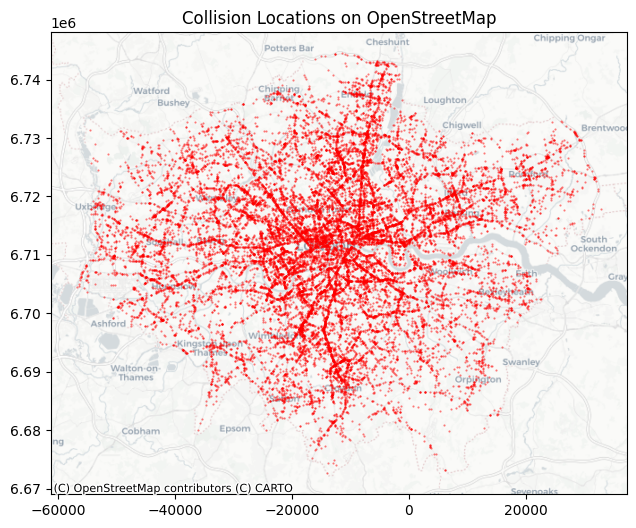

In [681]:
geometry_map = [Point(xy) for xy in zip(collisions_in_msoa['longitude'], collisions_in_msoa['latitude'])]  # create a geometry column
gdf_all = gpd.GeoDataFrame(collisions_in_msoa, geometry=geometry_map, crs="EPSG:4326")

gdf_all = gdf_all.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf_all.plot(ax=ax, color='red', markersize=0.3, alpha=0.5)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Collision Locations on OpenStreetMap')
plt.show()

In [682]:
london_vehicle_accident = gdf_all.merge(df_vehicle, on='accident_index', how='left')
london_vehicle_accident = london_vehicle_accident.dropna(subset=['longitude'])
london_vehicle_accident

accident_index  accident_year_x  accident_severity  number_of_vehicles  \
0      2023010419171             2023                  3                   1   
1      2023010419183             2023                  3                   3   
2      2023010419183             2023                  3                   3   
3      2023010419183             2023                  3                   3   
4      2023010419189             2023                  3                   2   
...              ...              ...                ...                 ...   
41366  2023481407567             2023                  2                   1   
41367  2023481409647             2023                  2                   1   
41368  2023481409652             2023                  3                   1   
41369  2023481409658             2023                  3                   2   
41370  2023481409665             2023                  3                   2   

       number_of_casualties  junction_control  junction_detail  \
0                         1                 4                9   
1                         2                 4                3   
2                         2                 4                3   
3                         2                 4                3   
4                         1                 4                1   
...                     ...               ...              ...   
41366                     1                -1                0   
41367                     1                 2                6   
41368                     1                 4                3   
41369                     1                 4                3   
41370                     1                -1                0   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            5                 4   
1                                            1                 4   
2                                            1                 4   
3                                            1                 4   
4                                            0                 4   
...                                        ...               ...   
41366                                        0                 4   
41367                                        5                 4   
41368                                        0                 4   
41369                                        0                 4   
41370                                        0                 1   

       weather_conditions  ...              generic_make_model  \
0                       8  ...  ALEXANDER DENNIS MODEL MISSING   
1                       1  ...                WRIGHTBUS GEMINI   
2                       1  ...                    TOYOTA YARIS   
3                       1  ...                    BMW 2 SERIES   
4                       1  ...                    LEXUS RX 400   
...                   ...  ...                             ...   
41366                   8  ...                             NaN   
41367                   1  ...                             NaN   
41368                   2  ...                             NaN   
41369                   1  ...                             NaN   
41370                   1  ...                             NaN   

       driver_imd_decile  driver_home_area_type lsoa_of_driver escooter_flag  \
0                    3.0                    1.0      E01001177           0.0   
1                    6.0                    1.0      E01001419           0.0   
2                    3.0                    1.0      E01001546           0.0   
3                    4.0                    1.0      E01001686           0.0   
4                    5.0                    1.0      E01002443           0.0   
...                  ...                    ...            ...           ...   
41366                NaN                    NaN            NaN           NaN   
41

In [683]:
gdf_all

accident_index  accident_year  accident_severity  number_of_vehicles  \
0      2023010419171           2023                  3                   1   
1      2023010419183           2023                  3                   3   
2      2023010419189           2023                  3                   2   
3      2023010419191           2023                  3                   2   
4      2023010419192           2023                  3                   2   
...              ...            ...                ...                 ...   
87863  2023481407567           2023                  2                   1   
87864  2023481409647           2023                  2                   1   
87865  2023481409652           2023                  3                   1   
87866  2023481409658           2023                  3                   2   
87867  2023481409665           2023                  3                   2   

       number_of_casualties  junction_control  junction_detail  \
0                         1                 4                9   
1                         2                 4                3   
2                         1                 4                1   
3                         1                 4                3   
4                         1                 4                8   
...                     ...               ...              ...   
87863                     1                -1                0   
87864                     1                 2                6   
87865                     1                 4                3   
87866                     1                 4                3   
87867                     1                -1                0   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            5                 4   
1                                            1                 4   
2                                            0                 4   
3                                            0                 4   
4                                            0                 4   
...                                        ...               ...   
87863                                        0                 4   
87864                                        5                 4   
87865                                        0                 4   
87866                                        0                 4   
87867                                        0                 1   

       weather_conditions  ...  road_type        date   time day_of_week  \
0                       8  ...          2  01/01/2023  01:24           1   
1                       1  ...          6  01/01/2023  02:25           1   
2                       1  ...          1  01/01/2023  03:50           1   
3                       9  ...          6  01/01/2023  02:13           1   
4                       1  ...          6  01/01/2023  01:42           1   
...                   ...  ...        ...         ...    ...         ...   
87863                   8  ...          3  14/12/2023  19:15           5   
87864                   1  ...          6  20/12/2023  18:00           4   
87865                   2  ...          6  23/12/2023  23:00           7   
87866                   1  ...          6  11/12/2023  07:15           2   
87867                   1  ...          3  28/12/2023  14:50           5   

      longitude   latitude                        geometry   MSOA11CD  \
0     -0.202878  51.418974  POINT (-22584.276 6695742.688)  E02000697   
1     -0.042464  51.671155   POINT (-4727.071 6740883.072)  E02000278   
2     -0.435789  51.487777   POINT (-48511.81 6708033.631)  E02000525   
3     -0.263972  51.597575  POINT (-29385.229 6727686.381)  E02000093   
4     -0.168976  51.477324  POINT (-18810.322 6706165.117)  E02000923   
...         ...        ...                             ...        ...   
87863 -0.108331  51.517763  POINT (

## Filter the data frame to only bike accident

In [684]:
# Filter the data frame to only include bike
df_bike = df_vehicle[df_vehicle['vehicle_type'] == 1]
df_bike
#print (df_bike['accident_index'].nunique())
#print (df_bike['accident_index'].value_counts())

accident_index  accident_year accident_reference  vehicle_reference  \
7       2023010419191           2023           10419191                  2   
11      2023010419201           2023           10419201                  1   
38      2023010419297           2023           10419297                  2   
53      2023010419324           2023           10419324                  2   
57      2023010419335           2023           10419335                  2   
...               ...            ...                ...                ...   
189690  2023991394948           2023          991394948                  2   
189757  2023991416532           2023          991416532                  2   
189759  2023991417384           2023          991417384                  2   
189764  2023991418531           2023          991418531                  1   
189775  2023991430845           2023          991430845                  1   

        vehicle_type  towing_and_articulation  vehicle_manoeuvre  \
7                  1                        0                 18   
11                 1                        0                 18   
38                 1                        0                 18   
53                 1                        0                 18   
57                 1                        0                 14   
...              ...                      ...                ...   
189690             1                        0                  9   
189757             1                        0                 18   
189759             1                        0                  9   
189764             1                        0                 18   
189775             1                        0                 18   

        vehicle_direction_from  vehicle_direction_to  \
7                            8                     4   
11                           7                     3   
38                           7                     3   
53                           5                     1   
57                           1                     5   
...                        ...                   ...   
189690                       8                     4   
189757                       3                     7   
189759                       4                     1   
189764                       3                     7   
189775                       1                     5   

        vehicle_location_restricted_lane  ...  generic_make_model  \
7                                      0  ...                  -1   
11                                     0  ...                  -1   
38                                     0  ...                  -1   
53                                     0  ...                  -1   
57                                     0  ...                  -1   
...                                  ...  ...                 ...   
189690                                 0  ...                  -1   
189757                                 0  ...                  -1   
189759                                 0  ...                  -1   
189764                                 0  ...                  -1   
189775                                 0  ...                  -1   

        driver_imd_decile  driver_home_area_type  lsoa_of_driver  \
7                       2                      1       E01004679   
11                     10                      2       E01026413   
38                      3                      1       E01003574   
53                      1                      1       E01004675   
57                      7                      1       E01002896   
...                   ...                    ...             ...   
189690                 -1                     -1              -1   
189757                  1                      1              -1   
189759                  8                      1              -1   
189764                  8                      3              -1   
189

In [685]:
df_bike_join_collison = pd.merge(df_bike, df_collison_2023, on='accident_index', how='left')
print(f"Data frame bike_join_collison is {df_bike_join_collison.shape[0]:,} x {df_bike_join_collison.shape[1]}")

Data frame bike_join_collison is 15,667 x 51


In [686]:
# create a GeoDataFrame for df_collison_2023
geometry_bike = [Point(xy) for xy in zip(df_bike_join_collison['longitude'], df_bike_join_collison['latitude'])]
gdf_bike = gpd.GeoDataFrame(df_bike_join_collison, geometry=geometry_bike, crs="EPSG:4326")

# change to the same CRS
gdf_bike = gdf_bike.to_crs(epsg=3857)
msoa_london = msoa_london.to_crs(epsg=3857)

# spatial join
collisions_in_msoa_bike = gpd.sjoin(gdf_bike, msoa_london, how="inner", predicate='intersects')

# keep the columns of gdf_collison and choose the columns of msoa_london I want to keep
columns_to_keep = gdf_bike.columns.tolist() + ['MSOA11CD', 'LAD11CD', 'LAD11NM']
collisions_in_msoa_bike = collisions_in_msoa_bike[columns_to_keep]

# 查看結果
print(collisions_in_msoa_bike.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5026 entries, 0 to 11252
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   accident_index                           5026 non-null   object  
 1   accident_year_x                          5026 non-null   int64   
 2   accident_reference                       5026 non-null   object  
 3   vehicle_reference                        5026 non-null   int64   
 4   vehicle_type                             5026 non-null   int64   
 5   towing_and_articulation                  5026 non-null   int64   
 6   vehicle_manoeuvre                        5026 non-null   int64   
 7   vehicle_direction_from                   5026 non-null   int64   
 8   vehicle_direction_to                     5026 non-null   int64   
 9   vehicle_location_restricted_lane         5026 non-null   int64   
 10  junction_location               

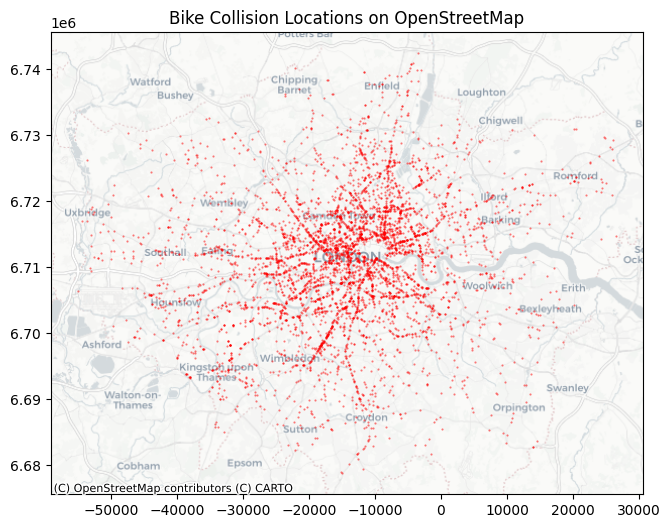

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5026 entries, 0 to 11252
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   accident_index                           5026 non-null   object  
 1   accident_year_x                          5026 non-null   int64   
 2   accident_reference                       5026 non-null   object  
 3   vehicle_reference                        5026 non-null   int64   
 4   vehicle_type                             5026 non-null   int64   
 5   towing_and_articulation                  5026 non-null   int64   
 6   vehicle_manoeuvre                        5026 non-null   int64   
 7   vehicle_direction_from                   5026 non-null   int64   
 8   vehicle_direction_to                     5026 non-null   int64   
 9   vehicle_location_restricted_lane         5026 non-null   int64   
 10  junction_location               

In [687]:
geometry_bike_map = [Point(xy) for xy in zip(collisions_in_msoa_bike['longitude'], collisions_in_msoa_bike['latitude'])] 
gdf_bike_map = gpd.GeoDataFrame(collisions_in_msoa_bike, geometry=geometry_bike_map, crs="EPSG:4326")

gdf_bike_map = gdf_bike_map.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf_bike_map.plot(ax=ax, color='red', markersize=0.3, alpha=0.5)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Bike Collision Locations on OpenStreetMap')
plt.show()

gdf_bike_map.info()
gdf_bike_map.to_csv('/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/bike_join_collison.csv', index=False)


In [688]:
columns_to_use_bike = ['accident_index','weather_conditions','road_type','vehicle_type', 'sex_of_driver', 'age_band_of_driver'
                       ,'date', 'time','day_of_week', 'longitude', 'latitude', 'geometry','MSOA11CD', 'LAD11CD', 'LAD11NM']
gdf_bike_analysis = gdf_bike_map[columns_to_use_bike]

gdf_bike_analysis.info()
print(f"Data frame bike_analysis is {gdf_bike_analysis.shape[0]:,} x {gdf_bike_analysis.shape[1]}")



<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5026 entries, 0 to 11252
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   accident_index      5026 non-null   object  
 1   weather_conditions  5026 non-null   float64 
 2   road_type           5026 non-null   float64 
 3   vehicle_type        5026 non-null   int64   
 4   sex_of_driver       5026 non-null   int64   
 5   age_band_of_driver  5026 non-null   int64   
 6   date                5026 non-null   object  
 7   time                5026 non-null   object  
 8   day_of_week         5026 non-null   float64 
 9   longitude           5026 non-null   float64 
 10  latitude            5026 non-null   float64 
 11  geometry            5026 non-null   geometry
 12  MSOA11CD            5026 non-null   object  
 13  LAD11CD             5026 non-null   object  
 14  LAD11NM             5026 non-null   object  
dtypes: float64(5), geometry(1), int64(

In [689]:
print(gdf_bike_analysis.head(5))
gdf_bike_analysis.to_csv('/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/bike_analysis.csv', index=False)


  accident_index  weather_conditions  road_type  vehicle_type  sex_of_driver  \
0  2023010419191                 9.0        6.0             1              1   
1  2023010419201                 1.0        6.0             1              1   
2  2023010419297                 1.0        2.0             1              1   
3  2023010419324                 1.0        6.0             1              1   
4  2023010419335                 1.0        6.0             1              1   

   age_band_of_driver        date   time  day_of_week  longitude   latitude  \
0                   6  01/01/2023  02:13          1.0  -0.263972  51.597575   
1                   5  01/01/2023  03:00          1.0  -0.097014  51.499145   
2                   6  01/01/2023  23:39          1.0   0.032626  51.542508   
3                   6  02/01/2023  13:00          2.0  -0.167511  51.529655   
4                   8  02/01/2023  14:30          2.0  -0.210802  51.518723   

                         geometry   MSOA11CD

In [690]:
cycle_lane.head(10)

type              name  \
0  FeatureCollection  cycle_lane_track   
1  FeatureCollection  cycle_lane_track   
2  FeatureCollection  cycle_lane_track   
3  FeatureCollection  cycle_lane_track   
4  FeatureCollection  cycle_lane_track   
5  FeatureCollection  cycle_lane_track   
6  FeatureCollection  cycle_lane_track   
7  FeatureCollection  cycle_lane_track   
8  FeatureCollection  cycle_lane_track   
9  FeatureCollection  cycle_lane_track   

                                            features  
0  {'type': 'Feature', 'geometry': {'type': 'Line...  
1  {'type': 'Feature', 'geometry': {'type': 'Line...  
2  {'type': 'Feature', 'geometry': {'type': 'Line...  
3  {'type': 'Feature', 'geometry': {'type': 'Line...  
4  {'type': 'Feature', 'geometry': {'type': 'Line...  
5  {'type': 'Feature', 'geometry': {'type': 'Line...  
6  {'type': 'Feature', 'geometry': {'type': 'Line...  
7  {'type': 'Feature', 'geometry': {'type': 'Line...  
8  {'type': 'Feature', 'geometry': {'type': 'Line...  
9  {'type': 'Feature', 'geometry': {'type': 'Line...

In [691]:
features = cycle_lane['features']
geometries = [shape(feature['geometry']) for feature in features]
gdf_cycle_lane = gpd.GeoDataFrame(geometry=geometries, crs="EPSG:4326")


map_cycle_lane = folium.Map(location=[51.5074, -0.1278], zoom_start=12)  


for _, row in gdf_cycle_lane.iterrows():
    folium.GeoJson(row['geometry']).add_to(map_cycle_lane)

map_cycle_lane.save('cycle_lane_map.html')


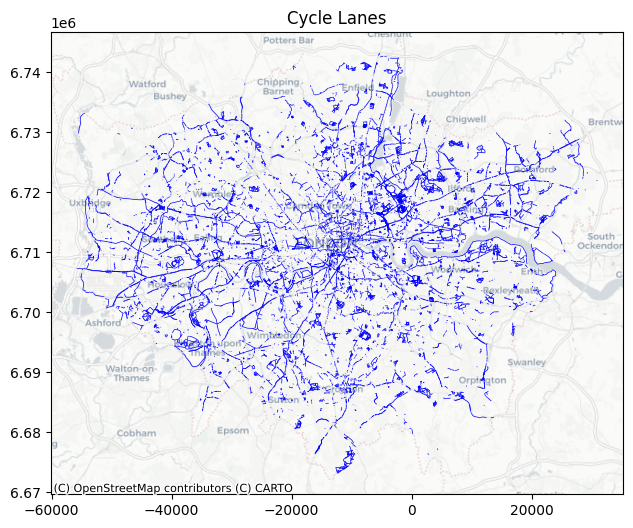

In [692]:
features = cycle_lane['features']
geometries = [shape(feature['geometry']) for feature in features]
gdf_cycle_lane = gpd.GeoDataFrame(geometry=geometries, crs="EPSG:4326")

# change the CRS to 3857
gdf_cycle_lane = gdf_cycle_lane.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf_cycle_lane.plot(ax=ax, color='blue', linewidth=0.5)

ctx.add_basemap(ax, zoom=10, source=ctx.providers.CartoDB.Positron)
ax.set_title('Cycle Lanes')
plt.show()

In [693]:
msoa_london = msoa_london.to_crs(epsg=27700)
gdf_cycle_lane = gdf_cycle_lane.to_crs(epsg=27700)

# using overlay to cut the line in each polygon
cut_lines = gpd.overlay(gdf_cycle_lane, msoa_london, how='intersection')

# calculate the length of the line in each msoa polygon
cut_lines['length'] = cut_lines.geometry.length/1000.0
lengths_by_msoa = cut_lines.groupby('MSOA11CD')['length'].sum().reset_index()

(lengths_by_msoa.sort_values(by='length', ascending=False))

MSOA11CD     length
689  E02000726  49.317133
734  E02000777  34.253956
820  E02000866  26.091602
494  E02000524  24.658805
0    E02000001  20.738740
..         ...        ...
451  E02000477   0.019754
691  E02000729   0.017087
31   E02000034   0.016693
23   E02000025   0.010664
940  E02006787   0.002778

[967 rows x 2 columns]

In [694]:
msoa_london = msoa_london.to_crs(epsg=27700)
msoa_london['area_km2'] = msoa_london.geometry.area / 1000000
msoa_london_area = msoa_london[['MSOA11CD', 'area_km2']]

msoa_london_area.sort_values(by='area_km2', ascending=False)

MSOA11CD   area_km2
958  E02006789  22.448181
504  E02000524  20.508069
272  E02000280  15.561696
477  E02000496  15.221679
28   E02000030  14.577405
..         ...        ...
842  E02000874   0.344286
853  E02000885   0.334913
837  E02000869   0.319463
183  E02000189   0.294951
363  E02000378   0.293826

[983 rows x 2 columns]

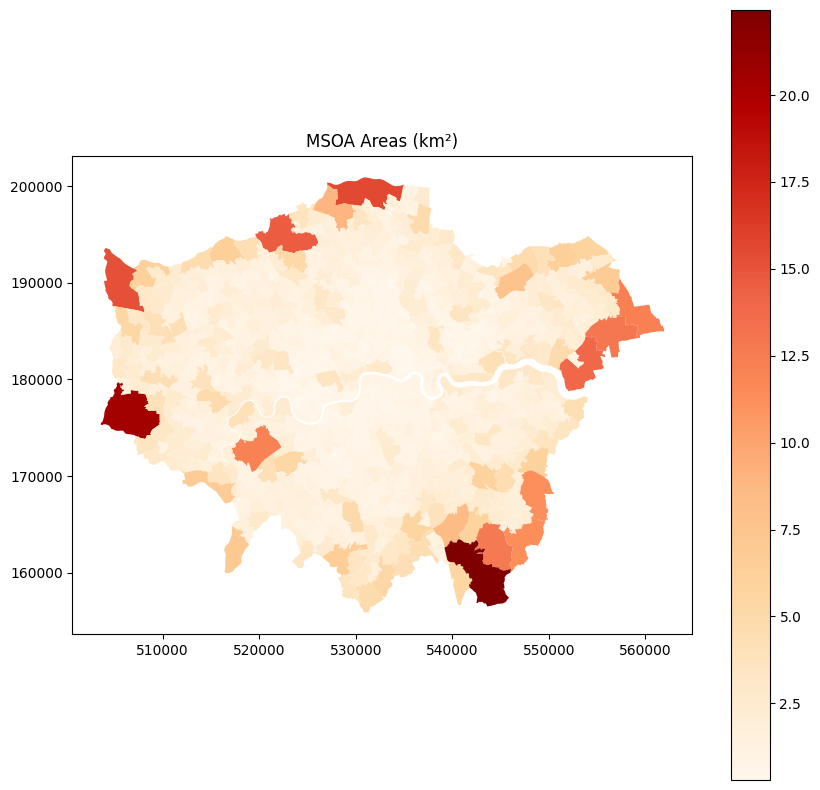

In [695]:
import matplotlib.pyplot as plt

msoa_london.plot(column='area_km2', legend=True, cmap='OrRd', figsize=(10, 10))
plt.title('MSOA Areas (km²)')
plt.show()

In [696]:
msoa_london.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA11CD   983 non-null    object  
 1   MSOA11NM   983 non-null    object  
 2   LAD11CD    983 non-null    object  
 3   LAD11NM    983 non-null    object  
 4   RGN11CD    983 non-null    object  
 5   RGN11NM    983 non-null    object  
 6   USUALRES   983 non-null    int32   
 7   HHOLDRES   983 non-null    int32   
 8   COMESTRES  983 non-null    int32   
 9   POPDEN     983 non-null    float64 
 10  HHOLDS     983 non-null    int32   
 11  AVHHOLDSZ  983 non-null    float64 
 12  geometry   983 non-null    geometry
 13  area_km2   983 non-null    float64 
dtypes: float64(3), geometry(1), int32(4), object(6)
memory usage: 92.3+ KB


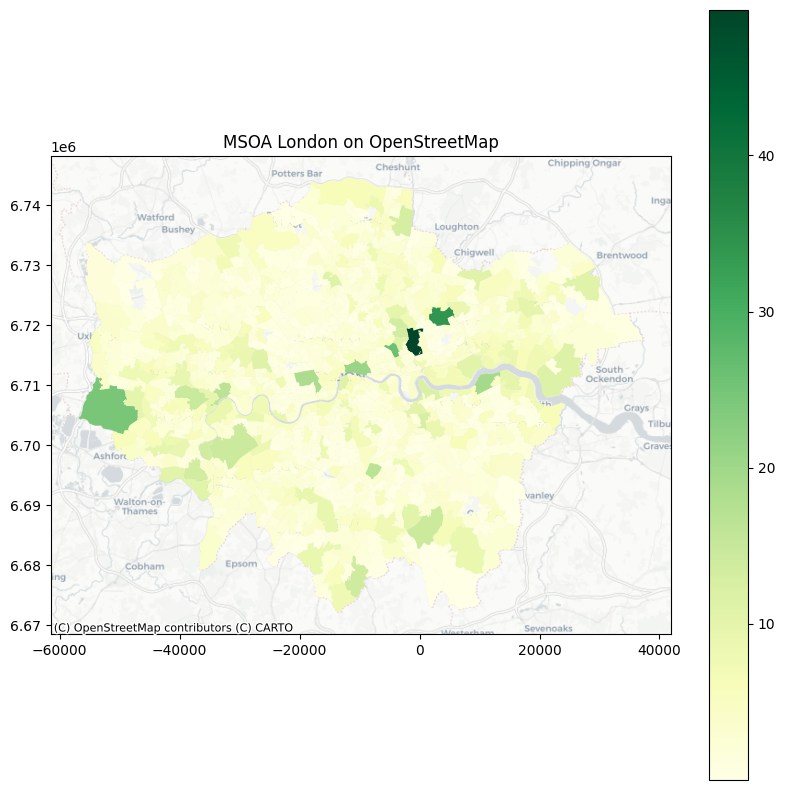

In [697]:
msoa_london_cycle_lane = pd.merge(msoa_london, lengths_by_msoa, on='MSOA11CD', how='left')
msoa_london_cycle_lane = msoa_london_cycle_lane.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
msoa_london_cycle_lane.plot(ax=ax, column='length', cmap='YlGn', legend=True)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('MSOA London on OpenStreetMap')
plt.show()



In [698]:
msoa_london_collison_count = collisions_in_msoa_bike.groupby('MSOA11CD')['accident_index'].count().reset_index()
msoa_london_collison_count.sort_values(by='accident_index', ascending=False) 

msoa_london_join = pd.merge(msoa_london, msoa_london_collison_count, on='MSOA11CD', how='left')
msoa_london_join_all = pd.merge(msoa_london_join, lengths_by_msoa, on='MSOA11CD', how='left')
msoa_london_join_all.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSOA11CD        983 non-null    object  
 1   MSOA11NM        983 non-null    object  
 2   LAD11CD         983 non-null    object  
 3   LAD11NM         983 non-null    object  
 4   RGN11CD         983 non-null    object  
 5   RGN11NM         983 non-null    object  
 6   USUALRES        983 non-null    int32   
 7   HHOLDRES        983 non-null    int32   
 8   COMESTRES       983 non-null    int32   
 9   POPDEN          983 non-null    float64 
 10  HHOLDS          983 non-null    int32   
 11  AVHHOLDSZ       983 non-null    float64 
 12  geometry        983 non-null    geometry
 13  area_km2        983 non-null    float64 
 14  accident_index  839 non-null    float64 
 15  length          967 non-null    float64 
dtypes: float64(5), geometry(1), int32(4), object(6)
memory

In [699]:
msoa_london_join_all.sort_values(by='accident_index', ascending=False)
msoa_london_join_all['accident_index'] = msoa_london_join_all['accident_index'].fillna(0)
msoa_london_join_all['length'] = msoa_london_join_all['length'].fillna(0)
msoa_london_join_all.sort_values(by='accident_index', ascending=False)


MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
944  E02000977           Westminster 018  E09000033           Westminster   
356  E02000371               Hackney 027  E09000012               Hackney   
939  E02000972           Westminster 013  E09000033           Westminster   
765  E02000795  Richmond upon Thames 012  E09000027  Richmond upon Thames   
554  E02000575             Islington 022  E09000019             Islington   
..         ...                       ...        ...                   ...   
320  E02000332             Greenwich 020  E09000011             Greenwich   
319  E02000331             Greenwich 019  E09000011             Greenwich   
317  E02000328             Greenwich 016  E09000011             Greenwich   
308  E02000317             Greenwich 005  E09000011             Greenwich   
0    E02000001        City of London 001  E09000001        City of London   

       RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
944  E12000007  London      7490      6719        771    29.8    3895   
356  E12000007  London     12369     11642        727   124.0    5672   
939  E12000007  London      8333      7617        716    64.5    4503   
765  E12000007  London      6898      6544        354     5.7    2623   
554  E12000007  London     11889     10418       1471   127.9    5583   
..         ...     ...       ...       ...        ...     ...     ...   
320  E12000007  London      7253      7239         14    35.9    2958   
319  E12000007  London      7831      7805         26    78.9    3236   
317  E12000007  London      6606      6512         94    75.4    3070   
308  E12000007  London      8370      8293         77   128.2    3200   
0    E12000007  London      7375      7187        188    25.5    4385   

     AVHHOLDSZ                                           geometry   area_km2  \
944        1.7  POLYGON ((530914.189 181358.202, 530978 181223...   2.518770   
356        2.1  POLYGON ((533554.057 183287.686, 533558.001 18...   0.996679   
939        1.7  POLYGON ((528896.689 182258.64, 528891.055 182...   1.289096   
765        2.5  POLYGON ((520428.798 175324.212, 520464.001 17...  12.096528   
554        1.9  POLYGON ((531991.089 182772.862, 532003.848 18...   0.929761   
..         ...                                                ...        ...   
320        2.4  POLYGON ((544480.653 177626.293, 544529.943 17...   2.029733   
319        2.4  POLYGON ((542200.755 177248.029, 542263.052 17...   0.991837   
317        2.1  POLYGON ((540366.5 178096.436, 540436.226 1777...   0.871573   
308        2.6  POLYGON ((542630.001 179101.999, 542643.385 17...   0.652083   
0          1.6  MULTIPOLYGON (((531667.625 180534.991, 531647....   2.905399   

     accident_index     length  
944            94.0   5.521020  
356            62.0   3.883134  
939            55.0   1.790202  
765            51.0  14.190158  
554            50.0   5.094812  
..              ...        ...  
320             0.0   3.267713  
319             0.0   0.942348  
317             0.0   0.214220  
308             0.0   0.000000  
0               0.0  20.738740  

[983 rows x 16 columns]

## Is there the lengh of bikeway is related to the bike accident?

#### step 0: why it is important to reseach the bike accident in london? data
#### step 1: calculate the bike length per km2 in each MSOA
#### step 2: Using bike length per Km2, count of bike accident to cluster the MSOA
#### step 3: focous on the city center cluster (I think there is more dangerous)

#### Step 4: What is the correlation between the bikeway length,other variable (percentage of Gender/ percentage of Weather/ percentage of Age /Population/ road type) and bike accidents in city center cluster

 



In [711]:
msoa_london_join_all = msoa_london_join_all[['MSOA11CD','MSOA11NM','LAD11CD','LAD11NM','POPDEN','area_km2','accident_index','length']]
msoa_london_join_all = pd.DataFrame(msoa_london_join_all)

msoa_london_join_all['accident_population_density'] = (
    msoa_london_join_all['accident_index'] / msoa_london_join_all['POPDEN']
)
msoa_london_join_all['bike_length_per_km2'] = (
    msoa_london_join_all['length'] / msoa_london_join_all['area_km2']
)


msoa_london_join_all.dropna(inplace=True)
msoa_london_join_all.sort_values(by='accident_population_density', ascending=False)

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
765  E02000795  Richmond upon Thames 012  E09000027  Richmond upon Thames   
944  E02000977           Westminster 018  E09000033           Westminster   
945  E02000978           Westminster 019  E09000033           Westminster   
939  E02000972           Westminster 013  E09000033           Westminster   
946  E02000979           Westminster 020  E09000033           Westminster   
..         ...                       ...        ...                   ...   
287  E02000295               Enfield 019  E09000010               Enfield   
821  E02000852                Sutton 013  E09000029                Sutton   
822  E02000853                Sutton 014  E09000029                Sutton   
286  E02000294               Enfield 018  E09000010               Enfield   
0    E02000001        City of London 001  E09000001        City of London   

     POPDEN   area_km2  accident_index     length  \
765     5.7  12.096528            51.0  14.190158   
944    29.8   2.518770            94.0   5.521020   
945    25.8   3.589007            42.0  18.516285   
939    64.5   1.289096            55.0   1.790202   
946    58.1   1.397778            42.0   4.096457   
..      ...        ...             ...        ...   
287    51.7   1.614840             0.0   4.009129   
821    78.4   0.936729             0.0   0.681314   
822    60.9   1.238573             0.0   1.769226   
286    59.2   1.957266             0.0   1.472974   
0      25.5   2.905399             0.0  20.738740   

     accident_population_density  bike_length_per_km2  
765                     8.947368             1.173077  
944                     3.154362             2.191951  
945                     1.627907             5.159166  
939                     0.852713             1.388727  
946                     0.722892             2.930692  
..                           ...                  ...  
287                     0.000000             2.482679  
821                     0.000000             0.727333  
822                     0.000000             1.428440  
286                     0.000000             0.752567  
0                       0.000000             7.138000  

[983 rows x 10 columns]

In [712]:
msoa_london_join_all_analysis = msoa_london_join_all[['MSOA11CD','MSOA11NM','LAD11CD','LAD11NM','POPDEN','area_km2','accident_index','length']]
msoa_london_join_all_analysis = pd.DataFrame(msoa_london_join_all_analysis)



msoa_london_join_all_analysis['accident_population_density'] = (
    msoa_london_join_all_analysis['accident_index'] / msoa_london_join_all_analysis['POPDEN']
)
msoa_london_join_all_analysis['bike_length_per_km2'] = (
    msoa_london_join_all_analysis['length'] / msoa_london_join_all_analysis['area_km2']
)


msoa_london_join_all_analysis.dropna(inplace=True)
msoa_london_join_all_analysis.sort_values(by='accident_population_density', ascending=False)



MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
765  E02000795  Richmond upon Thames 012  E09000027  Richmond upon Thames   
944  E02000977           Westminster 018  E09000033           Westminster   
945  E02000978           Westminster 019  E09000033           Westminster   
939  E02000972           Westminster 013  E09000033           Westminster   
946  E02000979           Westminster 020  E09000033           Westminster   
..         ...                       ...        ...                   ...   
287  E02000295               Enfield 019  E09000010               Enfield   
821  E02000852                Sutton 013  E09000029                Sutton   
822  E02000853                Sutton 014  E09000029                Sutton   
286  E02000294               Enfield 018  E09000010               Enfield   
0    E02000001        City of London 001  E09000001        City of London   

     POPDEN   area_km2  accident_index     length  \
765     5.7  12.096528            51.0  14.190158   
944    29.8   2.518770            94.0   5.521020   
945    25.8   3.589007            42.0  18.516285   
939    64.5   1.289096            55.0   1.790202   
946    58.1   1.397778            42.0   4.096457   
..      ...        ...             ...        ...   
287    51.7   1.614840             0.0   4.009129   
821    78.4   0.936729             0.0   0.681314   
822    60.9   1.238573             0.0   1.769226   
286    59.2   1.957266             0.0   1.472974   
0      25.5   2.905399             0.0  20.738740   

     accident_population_density  bike_length_per_km2  
765                     8.947368             1.173077  
944                     3.154362             2.191951  
945                     1.627907             5.159166  
939                     0.852713             1.388727  
946                     0.722892             2.930692  
..                           ...                  ...  
287                     0.000000             2.482679  
821                     0.000000             0.727333  
822                     0.000000             1.428440  
286                     0.000000             0.752567  
0                       0.000000             7.138000  

[983 rows x 10 columns]

In [713]:

Q1_accident = msoa_london_join_all_analysis['accident_population_density'].quantile(0.01)
Q3_accident = msoa_london_join_all_analysis['accident_population_density'].quantile(0.99)
IQR_accident = Q3_accident - Q1_accident

Q1_bike = msoa_london_join_all_analysis['bike_length_per_km2'].quantile(0.01)
Q3_bike = msoa_london_join_all_analysis['bike_length_per_km2'].quantile(0.99)
IQR_bike = Q3_bike - Q1_bike

# define the outlier range
lower_bound_accident = Q1_accident - 1.5 * IQR_accident
upper_bound_accident = Q3_accident + 1.5 * IQR_accident

lower_bound_bike = Q1_bike - 1.5 * IQR_bike
upper_bound_bike = Q3_bike + 1.5 * IQR_bike

# drop the outlier
msoa_london_join_all_analysis_drop = msoa_london_join_all_analysis[
    (msoa_london_join_all_analysis['accident_population_density'] >= lower_bound_accident) &
    (msoa_london_join_all_analysis['accident_population_density'] <= upper_bound_accident) &
    (msoa_london_join_all_analysis['bike_length_per_km2'] >= lower_bound_bike) &
    (msoa_london_join_all_analysis['bike_length_per_km2'] <= upper_bound_bike)
]

msoa_london_join_all_analysis_drop


MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0    E02000001        City of London 001  E09000001        City of London   
1    E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   
..         ...                       ...        ...                   ...   
978  E02006927             Greenwich 034  E09000011             Greenwich   
979  E02006928             Greenwich 035  E09000011             Greenwich   
980  E02006929             Greenwich 036  E09000011             Greenwich   
981  E02006930             Greenwich 037  E09000011             Greenwich   
982  E02006931             Greenwich 038  E09000011             Greenwich   

     POPDEN  area_km2  accident_index     length  accident_population_density  \
0      25.5  2.905399             0.0  20.738740                     0.000000   
1      31.3  2.165634             2.0   3.916544                     0.063898   
2      46.9  2.143565             0.0   7.752319                     0.000000   
3      24.8  2.490215             0.0   2.977456                     0.000000   
4      72.1  1.186180             1.0   3.052348                     0.013870   
..      ...       ...             ...        ...                          ...   
978    33.0  2.528268             2.0   8.753502                     0.060606   
979   136.0  0.540600            10.0   1.924987                     0.073529   
980    29.4  2.546627             7.0  12.217397                     0.238095   
981    75.6  0.867883            10.0   3.040090                     0.132275   
982    46.1  1.986049             6.0  10.299689                     0.130152   

     bike_length_per_km2  
0               7.138000  
1               1.808498  
2               3.616554  
3               1.195662  
4               2.573258  
..                   ...  
978             3.462252  
979             3.560837  
980             4.797482  
981             3.502880  
982             5.186019  

[980 rows x 10 columns]

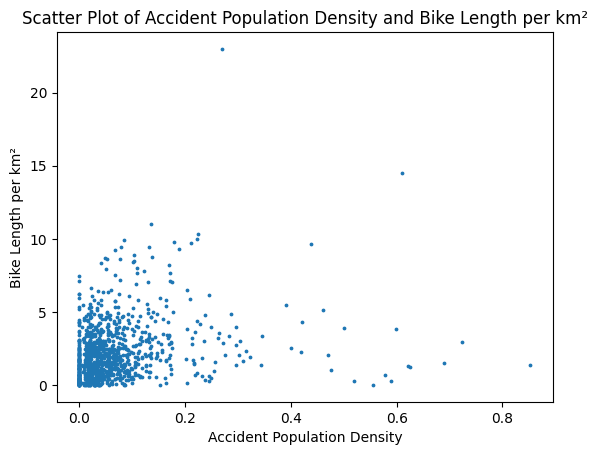

In [714]:
plt.scatter(
    msoa_london_join_all_analysis_drop['accident_population_density'],
    msoa_london_join_all_analysis_drop['bike_length_per_km2'],
    s=3,  
    alpha=1  
)
plt.xlabel('Accident Population Density')
plt.ylabel('Bike Length per km²')
plt.title('Scatter Plot of Accident Population Density and Bike Length per km²')
plt.show()

In [715]:
scaler = MinMaxScaler()
scaler.fit(msoa_london_join_all_analysis_drop[['accident_population_density', 'bike_length_per_km2']])
msoa_london_join_all_analysis_drop[['accident_population_density', 'bike_length_per_km2']] = scaler.transform(msoa_london_join_all_analysis_drop[['accident_population_density', 'bike_length_per_km2']])
msoa_london_join_all_analysis_drop.sort_values(by='accident_index', ascending=False)

/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_78240/1755766008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msoa_london_join_all_analysis_drop[['accident_population_density', 'bike_length_per_km2']] = scaler.transform(msoa_london_join_all_analysis_drop[['accident_population_density', 'bike_length_per_km2']])


MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
356  E02000371               Hackney 027  E09000012               Hackney   
939  E02000972           Westminster 013  E09000033           Westminster   
554  E02000575             Islington 022  E09000019             Islington   
946  E02000979           Westminster 020  E09000033           Westminster   
187  E02000193                Camden 028  E09000007                Camden   
..         ...                       ...        ...                   ...   
767  E02000797  Richmond upon Thames 014  E09000027  Richmond upon Thames   
770  E02000800  Richmond upon Thames 017  E09000027  Richmond upon Thames   
773  E02000803  Richmond upon Thames 020  E09000027  Richmond upon Thames   
777  E02000807             Southwark 001  E09000028             Southwark   
0    E02000001        City of London 001  E09000001        City of London   

     POPDEN  area_km2  accident_index     length  accident_population_density  \
356   124.0  0.996679            62.0   3.883134                     0.586364   
939    64.5  1.289096            55.0   1.790202                     1.000000   
554   127.9  0.929761            50.0   5.094812                     0.458455   
946    58.1  1.397778            42.0   4.096457                     0.847755   
187    70.1  1.086529            42.0   4.144912                     0.702633   
..      ...       ...             ...        ...                          ...   
767    76.4  0.905869             0.0   2.314603                     0.000000   
770    28.3  1.833379             0.0  13.675174                     0.000000   
773    48.1  1.955429             0.0   3.673532                     0.000000   
777   116.8  0.707010             0.0   2.154155                     0.000000   
0      25.5  2.905399             0.0  20.738740                     0.000000   

     bike_length_per_km2  
356             0.169418  
939             0.060388  
554             0.238281  
946             0.127439  
187             0.165885  
..                   ...  
767             0.111108  
770             0.324350  
773             0.081691  
777             0.132490  
0               0.310391  

[980 rows x 10 columns]

In [716]:
km = KMeans(n_clusters=3,)

cluster_result  = km.fit_predict(msoa_london_join_all_analysis_drop[['accident_population_density', 'bike_length_per_km2']])
msoa_london_join_all_analysis_drop['cluster'] = cluster_result
msoa_london_join_all_analysis_drop.sort_values(by='accident_index', ascending=False)

/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_78240/2170714775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msoa_london_join_all_analysis_drop['cluster'] = cluster_result


MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
356  E02000371               Hackney 027  E09000012               Hackney   
939  E02000972           Westminster 013  E09000033           Westminster   
554  E02000575             Islington 022  E09000019             Islington   
946  E02000979           Westminster 020  E09000033           Westminster   
187  E02000193                Camden 028  E09000007                Camden   
..         ...                       ...        ...                   ...   
767  E02000797  Richmond upon Thames 014  E09000027  Richmond upon Thames   
770  E02000800  Richmond upon Thames 017  E09000027  Richmond upon Thames   
773  E02000803  Richmond upon Thames 020  E09000027  Richmond upon Thames   
777  E02000807             Southwark 001  E09000028             Southwark   
0    E02000001        City of London 001  E09000001        City of London   

     POPDEN  area_km2  accident_index     length  accident_population_density  \
356   124.0  0.996679            62.0   3.883134                     0.586364   
939    64.5  1.289096            55.0   1.790202                     1.000000   
554   127.9  0.929761            50.0   5.094812                     0.458455   
946    58.1  1.397778            42.0   4.096457                     0.847755   
187    70.1  1.086529            42.0   4.144912                     0.702633   
..      ...       ...             ...        ...                          ...   
767    76.4  0.905869             0.0   2.314603                     0.000000   
770    28.3  1.833379             0.0  13.675174                     0.000000   
773    48.1  1.955429             0.0   3.673532                     0.000000   
777   116.8  0.707010             0.0   2.154155                     0.000000   
0      25.5  2.905399             0.0  20.738740                     0.000000   

     bike_length_per_km2  cluster  
356             0.169418        1  
939             0.060388        1  
554             0.238281        1  
946             0.127439        1  
187             0.165885        1  
..                   ...      ...  
767             0.111108        0  
770             0.324350        2  
773             0.081691        0  
777             0.132490        0  
0               0.310391        2  

[980 rows x 11 columns]

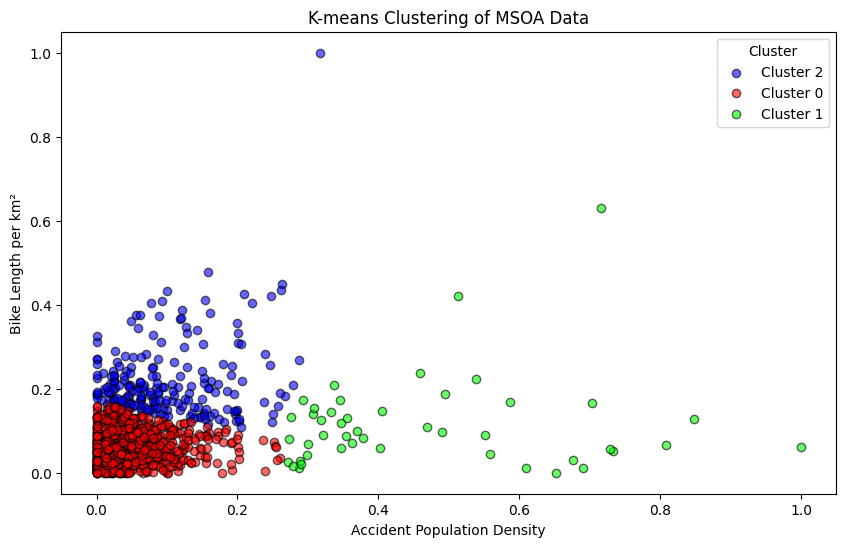

In [741]:
custom_colors = ['#FF0000', '#00FF00', '#0000FF']  # difine the color of cluster

plt.figure(figsize=(10, 6))

# get the unique cluster
clusters = msoa_london_join_all_analysis_drop['cluster'].unique()

# create a scatter plot for each cluster
for cluster in clusters:
    subset = msoa_london_join_all_analysis_drop[msoa_london_join_all_analysis_drop['cluster'] == cluster]
    plt.scatter(
        subset['accident_population_density'],
        subset['bike_length_per_km2'],
        label=f'Cluster {cluster}',  
        color=custom_colors[cluster],  # use the custom color
        alpha=0.6,  # transparency
        edgecolor='k'  # edge color
    )

plt.title('K-means Clustering of MSOA Data')
plt.xlabel('Accident Population Density')
plt.ylabel('Bike Length per km²')

plt.legend(title='Cluster')
plt.show()

In [739]:
msoa_london_join_all_analysis_drop
#compare msoa_london_join_all_analysis data frame and msoa_london_join_all_analysis_drop then join back the data frame I drop the outlier and give them clster 3
import pandas as pd

# 假設 msoa_london_join_all_analysis 是原始 DataFrame
# 並且 msoa_london_join_all_analysis_drop 是刪除離群值後的 DataFrame

# mark the outlier
msoa_london_join_all_analysis['is_outlier'] = (
    (msoa_london_join_all_analysis['accident_population_density'] < lower_bound_accident) |
    (msoa_london_join_all_analysis['accident_population_density'] > upper_bound_accident) |
    (msoa_london_join_all_analysis['bike_length_per_km2'] < lower_bound_bike) |
    (msoa_london_join_all_analysis['bike_length_per_km2'] > upper_bound_bike)
)

# separate the outlier from the original DataFrame
outliers = msoa_london_join_all_analysis[msoa_london_join_all_analysis['is_outlier']]

# give the outlier a new cluster label
outliers['cluster'] = 3

# combine the DataFrame without outlier and outlier DataFrame
combined_df = pd.concat([msoa_london_join_all_analysis_drop, outliers])

# remove the auxiliary column
combined_df.drop(columns=['is_outlier'], inplace=True)

.sort_values(by='cluster', ascending=False)

com

/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_78240/455277885.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['cluster'] = 3


MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
945  E02000978           Westminster 019  E09000033           Westminster   
944  E02000977           Westminster 018  E09000033           Westminster   
765  E02000795  Richmond upon Thames 012  E09000027  Richmond upon Thames   
418  E02000434                Harrow 002  E09000015                Harrow   
536  E02000557             Islington 004  E09000019             Islington   
..         ...                       ...        ...                   ...   
470  E02000489              Havering 026  E09000016              Havering   
471  E02000490              Havering 027  E09000016              Havering   
472  E02000491              Havering 028  E09000016              Havering   
473  E02000492              Havering 029  E09000016              Havering   
491  E02000511            Hillingdon 018  E09000017            Hillingdon   

     POPDEN   area_km2  accident_index     length  \
945    25.8   3.589007            42.0  18.516285   
944    29.8   2.518770            94.0   5.521020   
765     5.7  12.096528            51.0  14.190158   
418    43.8   1.965364             3.0   6.967801   
536   114.7   0.709893             7.0   2.362228   
..      ...        ...             ...        ...   
470    30.3   2.598172             0.0   3.515349   
471    38.2   2.050425             1.0   6.915207   
472    18.4   4.804367             3.0   7.714710   
473     4.5  14.050752             1.0  11.178933   
491    39.5   2.389850             1.0   0.861059   

     accident_population_density  bike_length_per_km2  cluster  
945                     1.627907             5.159166        3  
944                     3.154362             2.191951        3  
765                     8.947368             1.173077        3  
418                     0.080324             0.154165        2  
536                     0.071570             0.144698        2  
..                           ...                  ...      ...  
470                     0.000000             0.058835        0  
471                     0.030700             0.146654        0  
472                     0.191206             0.069826        0  
473                     0.260606             0.034597        0  
491                     0.029689             0.015667        0  

[983 rows x 11 columns]

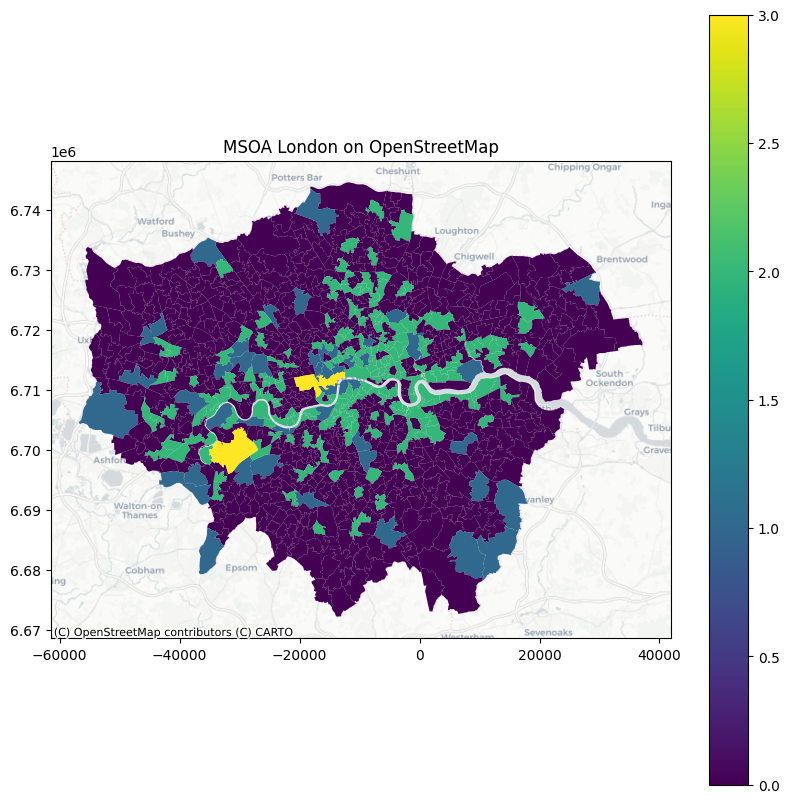

In [740]:
msoa_london_join_all_analysis_map = msoa_london.merge(combined_df, on='MSOA11CD', how='left')

msoa_london_join_all_analysis_map = msoa_london_join_all_analysis_map.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
msoa_london_join_all_analysis_map.plot(ax=ax, column='cluster', cmap='viridis', legend=True)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('MSOA London on OpenStreetMap')
plt.show()

In [746]:
combined_df_scatter = combined_df.merge(msoa_london_join_all_analysis, on='MSOA11CD', how='left')
combined_df_scatter

MSOA11CD                MSOA11NM_x  LAD11CD_x             LAD11NM_x  \
0    E02000001        City of London 001  E09000001        City of London   
1    E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   
..         ...                       ...        ...                   ...   
978  E02006930             Greenwich 037  E09000011             Greenwich   
979  E02006931             Greenwich 038  E09000011             Greenwich   
980  E02000795  Richmond upon Thames 012  E09000027  Richmond upon Thames   
981  E02000977           Westminster 018  E09000033           Westminster   
982  E02000978           Westminster 019  E09000033           Westminster   

     POPDEN_x  area_km2_x  accident_index_x   length_x  \
0        25.5    2.905399               0.0  20.738740   
1        31.3    2.165634               2.0   3.916544   
2        46.9    2.143565               0.0   7.752319   
3        24.8    2.490215               0.0   2.977456   
4        72.1    1.186180               1.0   3.052348   
..        ...         ...               ...        ...   
978      75.6    0.867883              10.0   3.040090   
979      46.1    1.986049               6.0  10.299689   
980       5.7   12.096528              51.0  14.190158   
981      29.8    2.518770              94.0   5.521020   
982      25.8    3.589007              42.0  18.516285   

     accident_population_density_x  bike_length_per_km2_x  ...  \
0                         0.000000               0.310391  ...   
1                         0.074935               0.078641  ...   
2                         0.000000               0.157264  ...   
3                         0.000000               0.051993  ...   
4                         0.016265               0.111896  ...   
..                             ...                    ...  ...   
978                       0.155123               0.152320  ...   
979                       0.152633               0.225511  ...   
980                       8.947368               1.173077  ...   
981                       3.154362               2.191951  ...   
982                       1.627907               5.159166  ...   

                   MSOA11NM_y  LAD11CD_y             LAD11NM_y POPDEN_y  \
0          City of London 001  E09000001        City of London     25.5   
1    Barking and Dagenham 001  E09000002  Barking and Dagenham     31.3   
2    Barking and Dagenham 002  E09000002  Barking and Dagenham     46.9   
3    Barking and Dagenham 003  E09000002  Barking and Dagenham     24.8   
4    Barking and Dagenham 004  E09000002  Barking and Dagenham     72.1   
..                        ...        ...                   ...      ...   
978             Greenwich 037  E09000011             Greenwich     75.6   
979             Greenwich 038  E09000011             Greenwich     46.1   
980  Richmond upon Thames 012  E09000027  Richmond upon Thames      5.7   
981           Westminster 018  E09000033           Westminster     29.8   
982           Westminster 019  E09000033           Westminster     25.8   

     area_km2_y  accident_index_y   length_y  accident_population_density_y  \
0      2.905399               0.0  20.738740                       0.000000   
1      2.165634               2.0   3.916544                       0.063898   
2      2.143565               0.0   7.752319                       0.000000   
3      2.490215               0.0   2.977456                       0.000000   
4      1.186180               1.0   3.052348                       0.013870   
..          ...               ...        ...                            ...   
978    0.867883              10.0   3.040090                       0.132275   
979    1.986049               6.0  10.299689              

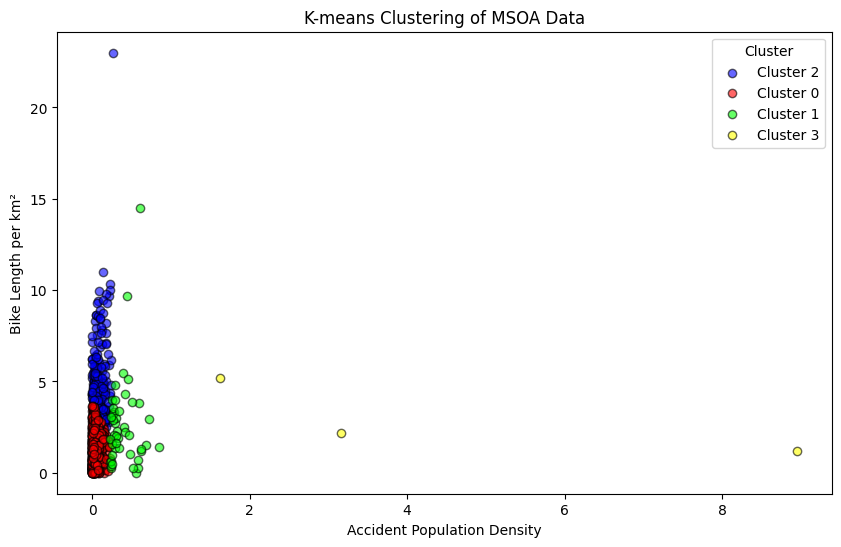

In [747]:
custom_colors = ['#FF0000', '#00FF00', '#0000FF','#FFFF00']  # difine the color of cluster

plt.figure(figsize=(10, 6))

# get the unique cluster
clusters = combined_df_scatter['cluster'].unique()

# create a scatter plot for each cluster
for cluster in clusters:
    subset = combined_df_scatter[combined_df_scatter['cluster'] == cluster]
    plt.scatter(
        subset['accident_population_density_y'],
        subset['bike_length_per_km2_y'],
        label=f'Cluster {cluster}',  
        color=custom_colors[cluster],  # use the custom color
        alpha=0.6,  # transparency
        edgecolor='k'  # edge color
    )

plt.title('K-means Clustering of MSOA Data')
plt.xlabel('Accident Population Density')
plt.ylabel('Bike Length per km²')

plt.legend(title='Cluster')
plt.show()

In [456]:
msoa_london_join_all_analysis_map = msoa_london_join_all_analysis_map.to_crs(epsg=4326)
msoa_london_join_all_analysis_map.to_file(
    '/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative-Methods/Assessment/group work/data/msoa_london_join_all_analysis_map.geojson',
    driver='GeoJSON'
)


### Why bike accident is important in London?

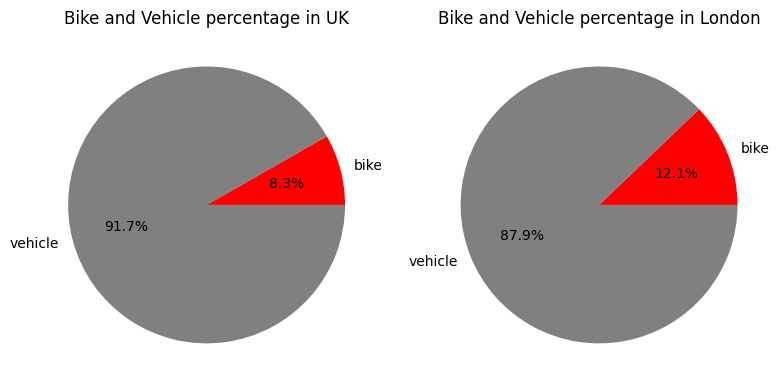

In [748]:
import matplotlib.pyplot as plt

bike_uk = 15667
vehicle_uk = 189815 - bike_uk

bike_london = 5026
vehicle_london = 41371 - bike_london

# 創建一個圖形和兩個子圖
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# 繪製第一個餅圖
axs[0].pie([bike_uk, vehicle_uk], labels=['bike', 'vehicle'], autopct='%1.1f%%', colors=['red', 'gray'])
axs[0].set_title('Bike and Vehicle percentage in UK')

# 繪製第二個餅圖
axs[1].pie([bike_london, vehicle_london], labels=['bike', 'vehicle'], autopct='%1.1f%%', colors=['red', 'gray'])
axs[1].set_title('Bike and Vehicle percentage in London')

# 顯示圖形
plt.tight_layout()
plt.show()


### overall vehicle accident in UK 189815
### overall bike accident in UK 15667
### overall vehicle accident in London 41371
### overall bike accident in London 5026 



The length of bikeway /percentage of Gender/ percentage of Weather/ percentage of Age /Population (by MSOA)
MSOA11CD is the unique ID
Continuous:  bike lane length, MSOA area, per m2 bike lane length, accident count
Categorical: road type, weather conditions, age_band_of_driver, sex_of_driver
time: date, time, day of week
cluster ananlysis for MSOA (I want to classfy the urban and rural area)